In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASETS

In [2]:
sprint_race_results = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Sprint_Race_Results.csv')
qualifying_results = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Qualifying_Results.csv')
track_information = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Track_Information.csv')
constructor_rankings = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Constructor_Rankings.csv')
constructor_performance = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Constructor_Performance.csv')
race_status = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Status.csv')
driver_rankings = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Driver_Rankings.csv')
race_schedule = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Schedule.csv')
team_details = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Team_Details.csv')
lap_timings = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Lap_Timings.csv')
driver_details = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Driver_Details.csv')
race_results = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Results.csv')
pit_stop_records = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Pit_Stop_Records.csv')
season_summaries = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Season_Summaries.csv')

In [5]:
datasets = [sprint_race_results, qualifying_results, track_information, constructor_rankings, constructor_performance, race_status, driver_rankings, race_schedule, team_details, lap_timings, driver_details, race_results, pit_stop_records, season_summaries]
dataset_names = ['Sprint Race Results', 'Qualifying Results', 'Track Information', 'Constructor Rankings', 'Constructor Performance', 'Race Status', 'Driver Rankings', 'Race Schedule', 'Team Details', 'Lap Timings', 'Driver Details', 'Race Results', 'Pit Stop Records', 'Season Summaries']

for name, dataset in zip(dataset_names, datasets):
    print(f"\n{name} Dataset:\n")
    display(dataset.head())


Sprint Race Results Dataset:



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1



Qualifying Results Dataset:



,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236



Track Information Dataset:



,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park



Constructor Rankings Dataset:



,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0



Constructor Performance Dataset:



,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N



Race Status Dataset:



,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine



Driver Rankings Dataset:



,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0



Race Schedule Dataset:



,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N



Team Details Dataset:



,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso



Lap Timings Dataset:



,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342



Driver Details Dataset:



,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen



Race Results Dataset:



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1



Pit Stop Records Dataset:



,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842



Season Summaries Dataset:



,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


CONVERT DATE COLUMNS TO DATETIME FORMAT, HANDLING ERRORS

In [7]:
date_columns = ['date', 'fp1_date', 'fp2_date', 'fp3_date', 'quali_date', 'sprint_date']
for col in date_columns:
    race_schedule[col] = pd.to_datetime(race_schedule[col], errors='coerce')

MERGE RACE RESULTS WITH RACE SCHEDULE TO GET THE YEAR OF EACH RACE

In [8]:
race_results_merged = pd.merge(race_results, race_schedule[['raceId', 'year']], on='raceId')

GROUP BY YEAR AND CALCULATE THE TOTAL POINTS FOR EACH YEAR

In [10]:
points_per_year = race_results_merged.groupby('year')['points'].sum().reset_index()

PLOT THE TOTAL POINTS PER YEAR

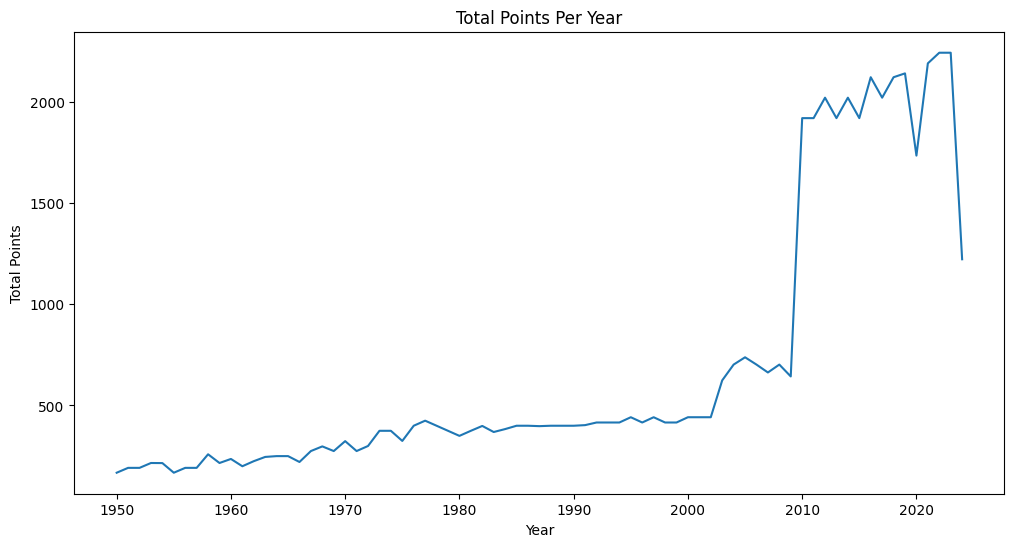

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=points_per_year, x='year', y='points')
plt.title('Total Points Per Year')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.show()

MERGE CONSTRUCTOR PERFORMANCE WITH TEAM DETAILS TO GET THE CONSTRUCTOR NAMES

In [12]:
constructor_performance_merged = pd.merge(constructor_performance, team_details[['constructorId', 'name']], on='constructorId')

GROUP BY CONSTRUCTOR AND CALCULATE THE TOTAL POINTS FOR EACH CONSTRUCTOR

In [14]:
points_per_constructor = constructor_performance_merged.groupby('name')['points'].sum().reset_index()

PLOT THE TOTAL POINTS PER CONSTRUCTOR

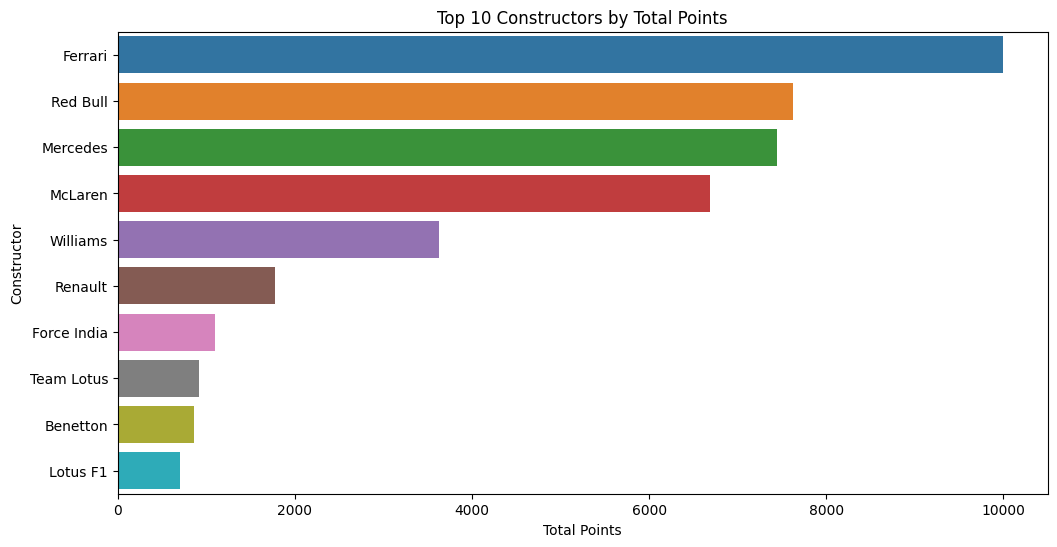

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=points_per_constructor.sort_values(by='points', ascending=False).head(10), x='points', y='name')
plt.title('Top 10 Constructors by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Constructor')
plt.show()

In [16]:
points_per_constructor.head()

,name,points
0,AGS,2.0
1,ATS,7.0
2,Alfa Romeo,199.0
3,AlphaTauri,309.0
4,Alpine F1 Team,457.0


SELECT ONLY NUMERIC ONES

In [17]:
numeric_df = race_results.select_dtypes(include=[np.number])

CALCULATE THE CORRELATION MATRIX

In [18]:
corr_matrix = numeric_df.corr()

PLOT THE CORRELATION HEATMAP

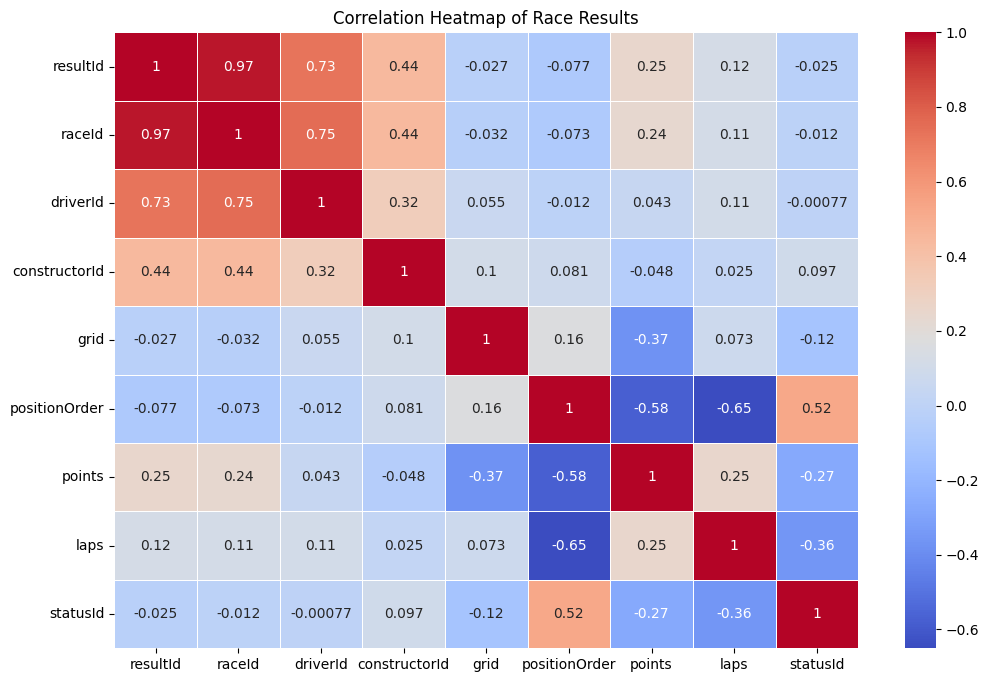

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Race Results')
plt.show()

In [20]:
points_per_constructor.duplicated().sum()

0

In [21]:
points_per_constructor.isna().sum()

name      0
points    0
dtype: int64

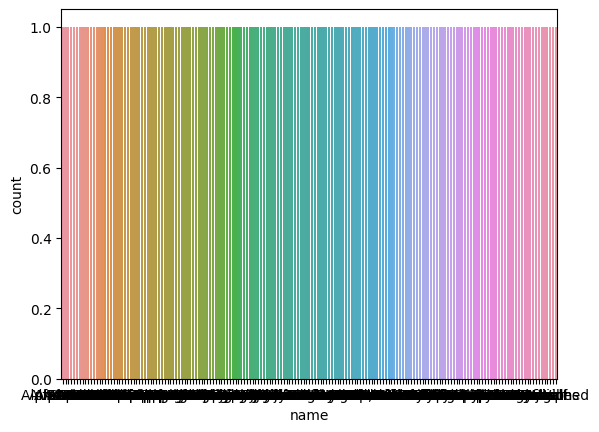

In [22]:
for col in points_per_constructor:
    if points_per_constructor[col].dtype == 'O':
        sns.countplot(x=col,data=points_per_constructor)
        plt.show()

PREPARE THE DATA FOR PREDICTION

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

MERGE RACE RESULTS WITH QUALIFYING RESULTS

In [24]:
race_qualifying_merged = pd.merge(race_results, qualifying_results[['raceId', 'driverId', 'position']], on=['raceId', 'driverId'], suffixes=('', '_qualifying'))

SELECT FEATURES AND TARGET VARIABLE

In [26]:
features = ['grid', 'position_qualifying', 'laps', 'points']
target = 'positionOrder'

DROP ROWS WITH MISSING VALUES

In [27]:
race_qualifying_merged = race_qualifying_merged.dropna(subset=features + [target])

SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [28]:
X = race_qualifying_merged[features]
y = race_qualifying_merged[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAIN A RANDOM FOREST CLASSIFIER

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

MAKE PREDICTIONS ON THE TEST SET

In [30]:
y_pred = model.predict(X_test)

CALCULATE THE ACCURACY OF THE MODEL

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

Prediction Accuracy: 0.38


Conclusion ¶


In this notebook, we've explored various aspects of the Formula 1 Racing World Championship history dataset. We've analyzed race results, constructor performance, and even built a simple predictive model to forecast race positions.